<a href="https://colab.research.google.com/github/ranaharoonkhan/DS-Unit-1-Sprint-2-Statistics/blob/master/Copy_of_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [1]:
#importing liberaries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind,ttest_ind_from_stats,ttest_rel
#our header
header=['classname','handicapped_infants','water-prj-cost','adoption-budget','physician-fee-freeze',
         'el-salvador-aid','relig grp in school','anti-sat-tst-ban','nicaraguan-contras',
         'mx-missile','immigration','synfuels-corporation-cutback','education','right-to-sue',
         'crime','duty-free-exports','admin-act-SA']
#reading data
house= pd.read_csv('house.data',header=None, names=header,na_values='?')
house.head(5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,classname,handicapped_infants,water-prj-cost,adoption-budget,physician-fee-freeze,el-salvador-aid,relig grp in school,anti-sat-tst-ban,nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education,right-to-sue,crime,duty-free-exports,admin-act-SA
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [2]:
#replacing y and n with 1 & 0
house = house.replace({'y':1,'n':0})
house.head()

,classname,handicapped_infants,water-prj-cost,adoption-budget,physician-fee-freeze,el-salvador-aid,relig grp in school,anti-sat-tst-ban,nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education,right-to-sue,crime,duty-free-exports,admin-act-SA
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [3]:
#republican voting
republican= house[house['classname']=="republican"]
republican.shape

(168, 17)

In [4]:
#democrate voting
democrate= house[house['classname']=="democrat"]
democrate.shape

(267, 17)

In [6]:
#running test on immigration bill
print(republican['immigration'].mean())
print(democrate['immigration'].mean())
ttest_ind(republican['immigration'],democrate['immigration'],nan_policy='omit')

0.5575757575757576
0.4714828897338403


Ttest_indResult(statistic=1.7359117329695164, pvalue=0.08330248490425066)

In [19]:
#taking republicans votes on immigration bill as data
rep_immg= republican['immigration']
rep_immg

0      1.0
1      0.0
7      0.0
8      0.0
10     0.0
      ... 
427    1.0
430    1.0
432    0.0
433    NaN
434    1.0
Name: immigration, Length: 168, dtype: float64

In [46]:
#taking democrates votes on immigration bill as data
dem_immg= democrate['immigration']
dem_immg

2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
      ... 
425    1.0
426    1.0
428    1.0
429    1.0
431    1.0
Name: immigration, Length: 267, dtype: float64

In [0]:
#writing a function to determine the confidence interval on given sample array with default 95% confidence
def conf_int(data, confidence=0.95):
    mydata = np.array(data) 
    mymean = np.mean(data)
    n = len(data)
    stderr = np.std(data, ddof=1)/np.sqrt(n)
    margin = stderr*stats.t.ppf((1 + confidence)/ 2, n-1)
    return (mymean, mymean - margin, mymean + margin)

In [45]:
#taking immigration bill with republican votings on it as sample
Mean , Lower , Upper = conf_int(rep_immg)
print(Mean)
print(Lower)
print(Upper)

0.5575757575757576
0.4816929198405456
0.6334585953109697


In [47]:
#taking immigration bill with democrates votings on it as sample
Mean , Lower , Upper = conf_int(dem_immg)
print(Mean)
print(Lower)
print(Upper)

0.4714828897338403
0.4112182346521196
0.531747544815561


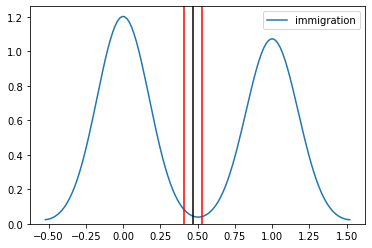

In [50]:
#ploting democrates on immgration bill
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(dem_immg)
CI = conf_int(dem_immg)
plt.axvline(x=CI[1], color='red');
plt.axvline(x=CI[2], color='red');
plt.axvline(x=CI[0], color='black');

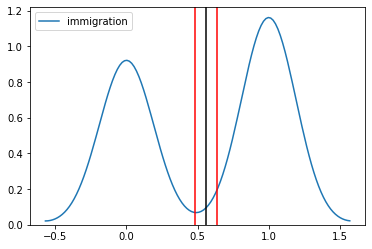

In [51]:
#ploting republicans on immigration bill
sns.kdeplot(rep_immg)
CI = conf_int(rep_immg)
plt.axvline(x=CI[1], color='red');
plt.axvline(x=CI[2], color='red');
plt.axvline(x=CI[0], color='black');

In [52]:
# taking previous data set
url='https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv'
adults = pd.read_csv(url, na_values=' ?')
adults.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [53]:
adults.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [54]:
adults['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [55]:
# catagories of age
adults['age_groups']=0
adults.loc[adults['age']>20, 'age_groups']=1
adults.loc[adults['age']>30, 'age_groups']=2
adults.loc[adults['age']>40, 'age_groups']=3
adults.loc[adults['age']>50, 'age_groups']=4
adults['age_groups'].value_counts().sort_index()

0    2410
1    8162
2    8546
3    6983
4    6460
Name: age_groups, dtype: int64

In [57]:
crosstab = pd.crosstab(adults['age_groups'], adults['salary']).values
crosstab

array([[2408,    2],
       [7482,  680],
       [6140, 2406],
       [4328, 2655],
       [4362, 2098]])

In [60]:
#Chi-squared tests in one line
stats.chi2_contingency(crosstab)

(2935.441819762824, 0.0, 4, array([[1829.64896656,  580.35103344],
        [6196.51239213, 1965.48760787],
        [6488.04152207, 2057.95847793],
        [5301.42686035, 1681.57313965],
        [4904.3702589 , 1555.6297411 ]]))

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)